<a href="https://colab.research.google.com/github/praths007/machine_learning_intuition/blob/master/nn_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding neural networks using gradient descent**

In [4]:
rm(list = ls())
### caret only used for stratified random sampling
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [5]:
### loading dataset
############################################
iris_data = iris[which(iris$Species %in% c("setosa", "versicolor")),]
## not used 1 and 0 because array indexes in R start from 1.
## this will ease the computation while creating seq...
## also this can be used to do multiclass classification
## where labels could be 1,2,3 etc...

iris_data$Species = ifelse(iris_data$Species == "setosa", 1, 2)


### adding intercept column to the data
iris_data$intercept = 1

iris_data = cbind(intercept = iris_data$intercept, 
                  iris_data[,c("Petal.Length", "Petal.Width", "Species")])

index = unlist(createDataPartition(iris_data$Species, p =  0.7))

train_x = data.matrix(iris_data[index,c("intercept", "Petal.Length", "Petal.Width")])

train_y = data.matrix(iris_data[index,c("Species")])


test_x = data.matrix(iris_data[-index, c("intercept", "Petal.Length", "Petal.Width")])

test_y = data.matrix(iris_data[-index, c("Species")])

nrow(train_x)
nrow(test_x)
############################################

[1] 70

[1] 30

In [0]:
### defining required functions
############################################

squared_error_cost = function(y, yhat){
  return((1 / nrow(y)) * sum((y - yhat)^2))}

## evaluation metric/ cost function logloss is used for classification
## https://datawookie.netlify.com/blog/2015/12/making-sense-of-logarithmic-loss/
logloss_cost = function(y, yhat){
  return(-(1 / nrow(y)) * sum((y*log(yhat) + (1 - y)*log(1 - yhat))))}

## activation function - used to limit values between 0 and 1
sigmoid = function(x){
  return(1 / (1 + 2.71^-x))}

## used for backpropogation
sigmoidGradient = function(x){
  return(sigmoid(x) * (1 - sigmoid(x)))}
############################################


In [7]:
#### neural networks intuition
################################################

num_labels = 2 # 1 and 2 in our case

m = dim(train_x)[1]
n = dim(train_x)[2]

## number of nodes in 1st layer/input layer must
## equal number of columns/ features of input data
layer1_nodes = ncol(train_x)

## this layer can have as many nodes as required
## rule of thumb is usually 1.5 times or equal number
## this is the hidden layer
layer2_nodes = trunc(ncol(train_x) * 1.5)

# final output layer nodes = number of labels
output_layer_nodes = num_labels


Theta1 = array(runif(n = gaussian(), min = 0, max = 1), c(layer2_nodes, layer1_nodes))

Theta2 = array(runif(n = gaussian(), min = 0, max = 1), c(output_layer_nodes, layer2_nodes+1))

## input layer
a1 = train_x

z2 = a1 %*% t(Theta1)

a2 = sigmoid(z2)

# second layer (hidden layer)
a2 = cbind(1, a2)

z3 = a2 %*% t(Theta2)

# third layer (output layer)
a3 = sigmoid(z3)

## neural network cost:
# it is a triple summation of logistic cost (because we are using sigmoid as activation),
# where the innermost summation is sum of cost for each node within a layer
# think of this as a collection of logistic regression models where each node represents
# one logit model (having sigmoid as its activation, similar to what was done in logit intuition)

individual_train = array(0L, m)
individual_theta_k = array(0L, output_layer_nodes)
for(i in seq(1, m)){
  # for calculating innermost summation of cost (which is basically cost/error
  # for each node of the output layer wrt actual value)
  for(k in seq(1, num_labels)){
    individual_theta_k[k] = as.numeric(train_y[i,] == k)  * log(a3[i, k]) + 
                          (1 - as.numeric(train_y[i,] == k)) * log(1 - a3[i, k])
  }
  # summation of errors at each label K for each input tuple/ row
  individual_train[i] = sum(individual_theta_k)
}
# summation of errors for all tuples
cost = -(1/m) * sum(individual_train)
cost


## backpropogation (adjusting weights of previous layers wrt error in output layer)
## delta3 = error in output layer
## again done for each node in the layer
delta3 = array(0L, c(dim(a3)))
for(i in seq(1, m)){
  for(k in seq(1, num_labels)){
    delta3[i, k] = a3[i, k] - as.numeric(train_y[i,] == k)
  }
}

# this is the error
delta3

# we will be taking a negative gradient of this error/ cost to calculate the
# direction of steepest ascent and then adjust weights for each node of each layer
# accordingly

delta2 = (delta3 %*% Theta2[,2:ncol(Theta2)]) * sigmoidGradient(z2)

Theta1_grad = (1 / m) * t(delta2) %*% a1
Theta2_grad = (1 / m) * t(delta3) %*% a2
  
alpha = 0.001
Theta1 = Theta1 - alpha * Theta1_grad
Theta2 = Theta2 - alpha * Theta2_grad

[1] 2.767547

-0.07611479,0.9034793
-0.07611479,0.9034793
-0.07490820,0.9047159
-0.07611479,0.9034793
-0.06854687,0.9119436
-0.07376584,0.9062052
-0.07611479,0.9034793
-0.07733222,0.9019046
-0.07490820,0.9047159
-0.07374733,0.9059134
-0.07052133,0.9098663


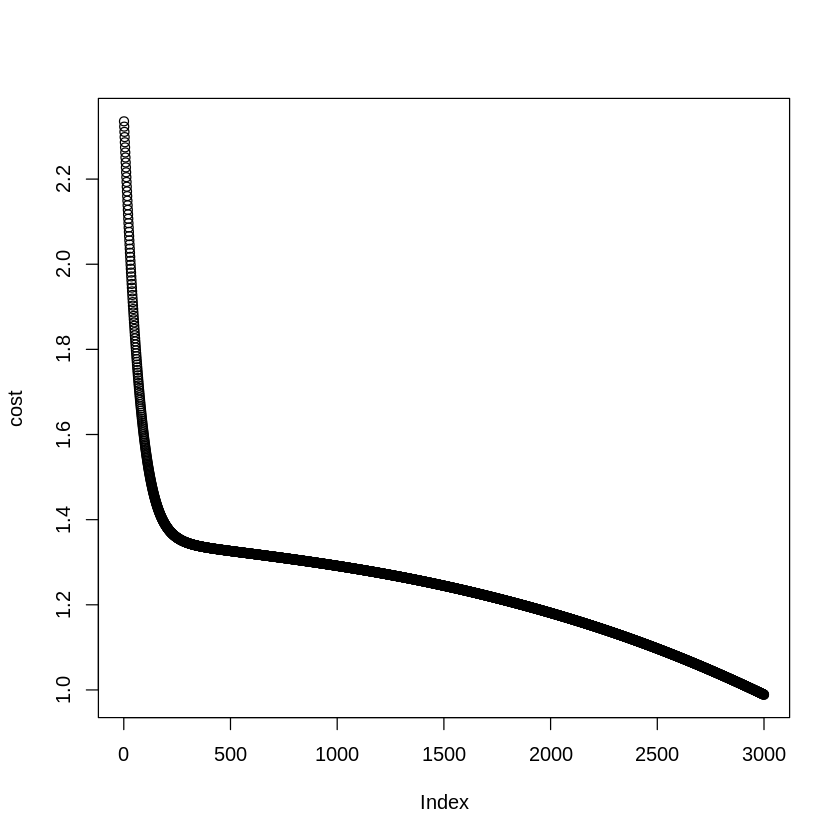

In [9]:
## gradient descent intuition

cost = c()
num_labels = 2 # 0 and 1 in our case

m = dim(train_x)[1]
n = dim(train_x)[2]

## number of nodes in 1st layer/input layer must
## equal number of columns/ features of input data
layer1_nodes = ncol(train_x)

## this layer can have as many nodes as required
## rule of thumb is usually 1.5 times or equal number
layer2_nodes = trunc(ncol(train_x) * 1.5)

# final output layer nodes = number of labels
output_layer_nodes = 2

gradient_descent_for_nn = function(alpha, iterations, train_x, train_y)
{
  ## initialize theta (weights)
  
  Theta1 = array(runif(n = gaussian(), min = 0, max = 1), c(layer2_nodes, layer1_nodes))
  
  Theta2 = array(runif(n = gaussian(), min = 0, max = 1), c(output_layer_nodes, layer2_nodes+1))
  
  
  for(i in seq(1, iterations)){
    
    a1 = train_x
    
    z2 = a1 %*% t(Theta1)
    
    a2 = sigmoid(z2)
    
    a2 = cbind(1, a2)
    
    
    z3 = a2 %*% t(Theta2)
    
    a3 = sigmoid(z3)
    
    
    individual_train = array(0L, m)
    individual_theta_k = array(0L, output_layer_nodes)
    for(i in seq(1, m)){
      for(k in seq(1, num_labels)){
        individual_theta_k[k] = as.numeric(train_y[i,] == k)  * log(a3[i, k]) + 
          (1 - as.numeric(train_y[i,] == k)) * log(1 - a3[i, k])
      }
      individual_train[i] = sum(individual_theta_k)
    }
    cost <<- c(cost, -(1/m) * sum(individual_train))
    # cost = c(cost, cost)
    # print(cost)
    
    
    
    delta3 = array(0L, c(dim(a3)))
    for(i in seq(1, m)){
      for(k in seq(1, num_labels)){
        delta3[i, k] = a3[i, k] - as.numeric(train_y[i,] == k)
      }
    }
    
    # delta3
    
    
    # delta2 = Theta2*delta3 * (derivative of activation function, which is sigmoid)
    # delta2 = Theta2*delta3 * a3 * (1 - a3)
    
    delta2 = (delta3 %*% Theta2[,2:ncol(Theta2)]) * sigmoidGradient(z2)
    
    Theta1_grad = (1 / m) * t(delta2) %*% a1
    Theta2_grad = (1 / m) * t(delta3) %*% a2
    
    # alpha = 0.001
    Theta1 = Theta1 - alpha * Theta1_grad
    Theta2 = Theta2 - alpha * Theta2_grad
    
  }
  return(list(Theta1, Theta2))
  
}


alpha = 0.01
## keep changing epochs, more epochs = more steps towards minimum cost
epochs = 3000

thetas = gradient_descent_for_nn(alpha, epochs, train_x, train_y)

plot(cost)

In [10]:
## predicting on test set
h1 = sigmoid(test_x %*% t(thetas[[1]]))
h2 = sigmoid(cbind(1, h1) %*% t(thetas[[2]]))


preds = apply(h2, 1, function(x) which(x == max(x)))

confusionMatrix(as.factor(preds), as.factor(test_y))
## 100% accuracy


Confusion Matrix and Statistics

          Reference
Prediction  1  2
         1 15  0
         2  0 15
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : 9.313e-10  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 1          
                                     